In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')


In [5]:
customer_df.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


# Formating dates

In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [7]:
customer_df['effective_to_date'] 

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [8]:
numerical_df= customer_df._get_numeric_data()
numerical_df



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [9]:
numerical_df.isna().sum()
#numerical_df.value_counts(dropna=False)

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [10]:
def continuous_discrete(variable):
    unique_values = variable.nunique()
    if unique_values > 100:
        return 'continuous'
    else:
        return 'discrete'




In [11]:
Splited_num_df = numerical_df.apply(continuous_discrete)
Splited_num_df.head(10)

customer_lifetime_value          continuous
income                           continuous
monthly_premium_auto             continuous
months_since_last_claim            discrete
months_since_policy_inception      discrete
number_of_open_complaints          discrete
number_of_policies                 discrete
total_claim_amount               continuous
dtype: object

In [12]:
discrete_numerical_df = numerical_df[["months_since_last_claim","months_since_policy_inception","number_of_open_complaints","number_of_policies"]]
discrete_numerical_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [13]:
continous_numerical_df = numerical_df[["customer_lifetime_value","income","monthly_premium_auto","total_claim_amount"]]
continous_numerical_df


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


# Continous variables are comparativly multicolineated than discrete

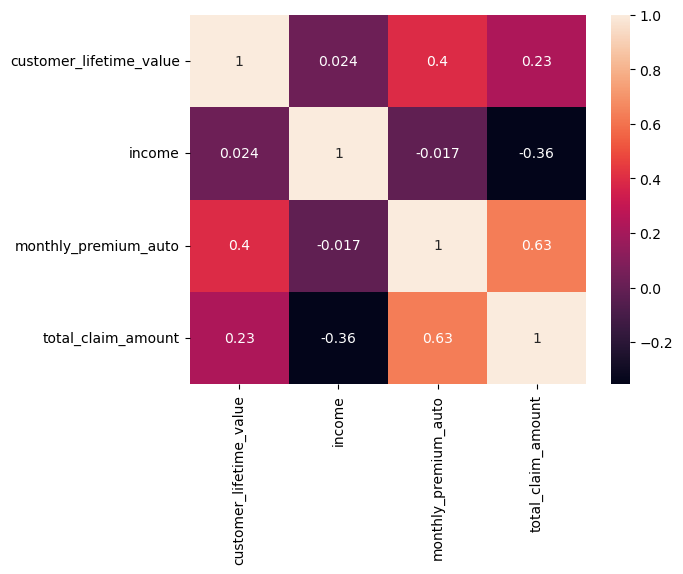

In [14]:

correlations_matrix = continous_numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# NO Presence of multicolinearity among discrete variables

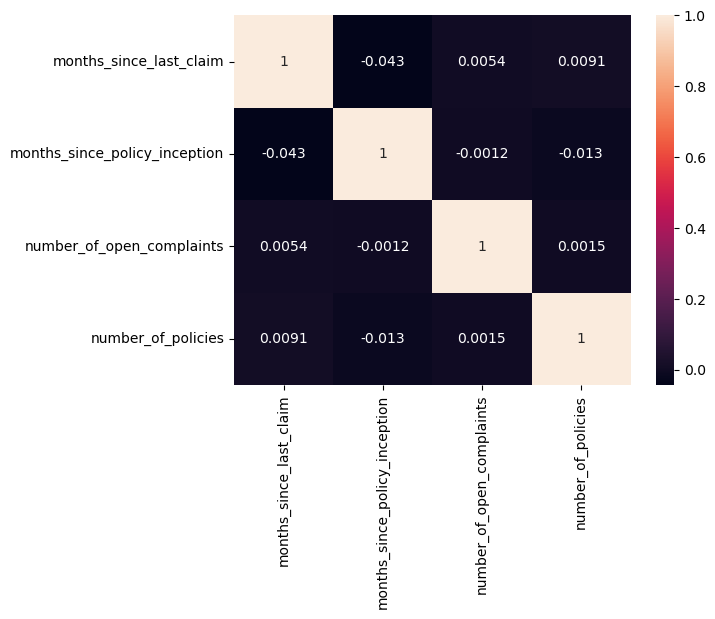

In [15]:

correlations_matrix = discrete_numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Continous visualisation

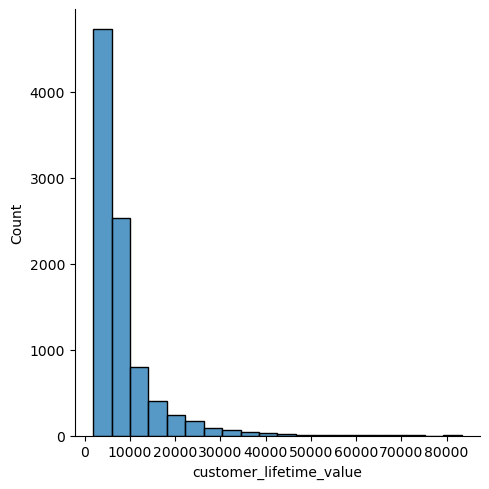

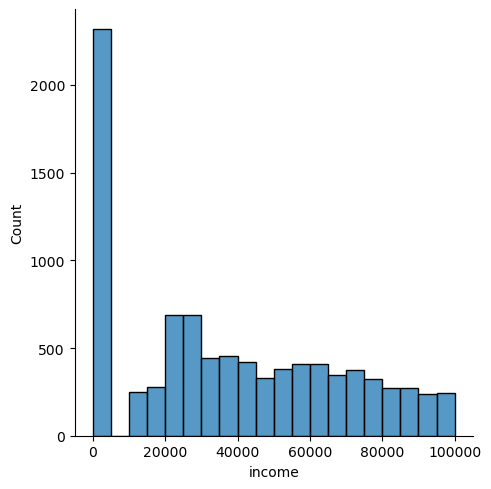

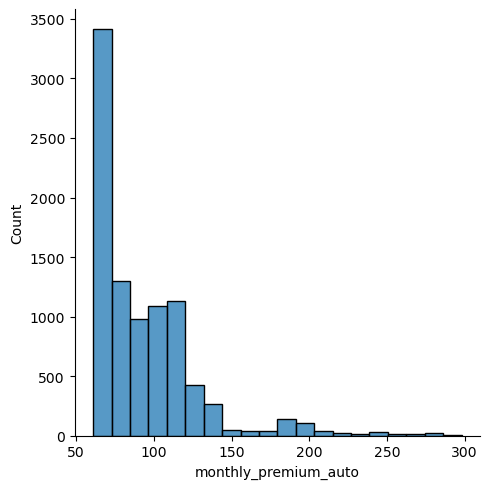

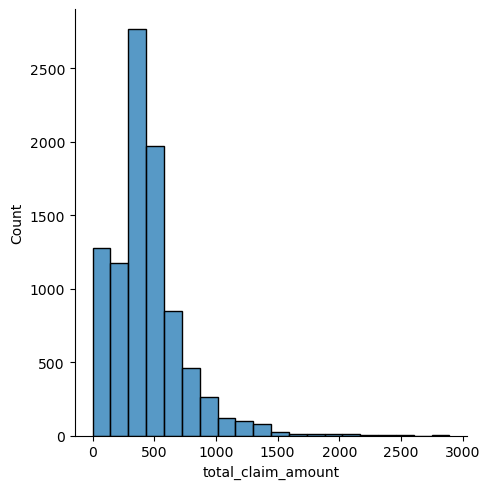

In [16]:
for col in continous_numerical_df.columns:
    sns.displot(continous_numerical_df[col], bins=20)
    plt.show()

# Discrete 'Visualising'

In [17]:
def discreteplot(x):
    for col in x.columns:
        if x[col].nunique() < 10:
            sns.countplot(x=col,data=x)
            plt.show()
        else:
            sns.histplot(x=col,data=x)
            plt.show()

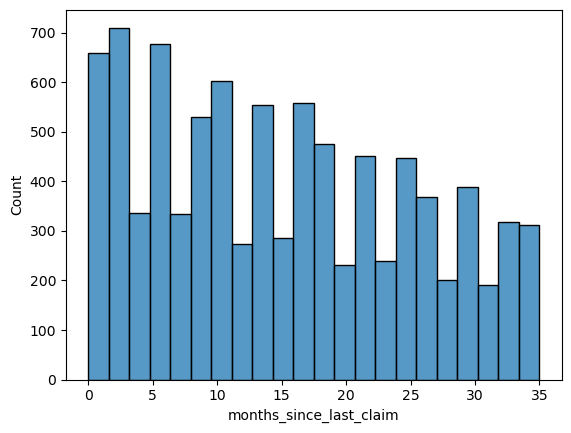

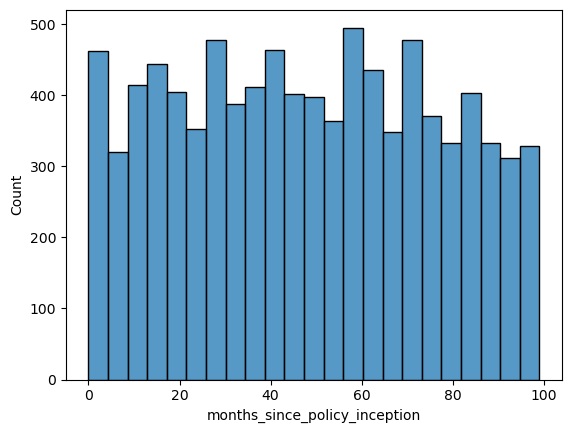

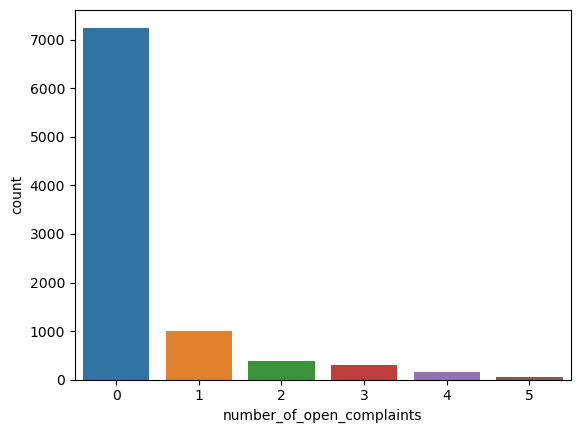

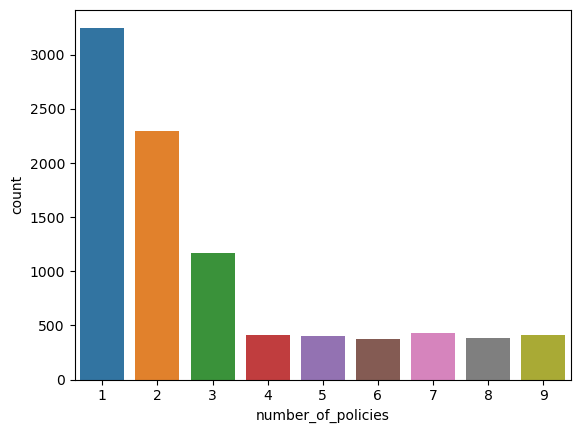

In [18]:
discreteplot(discrete_numerical_df)

In [19]:
#list(map(continuous_discrete,numerical_df))

# For Outliers in Continous

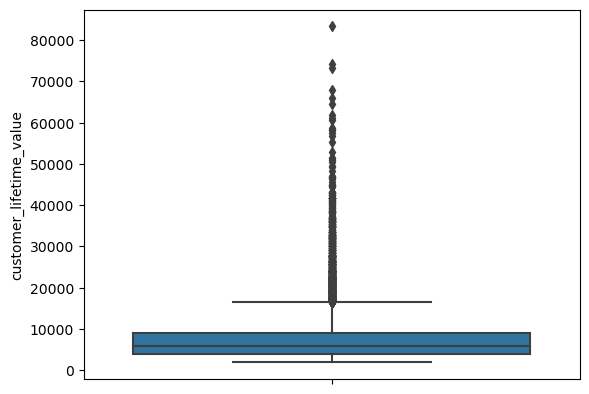

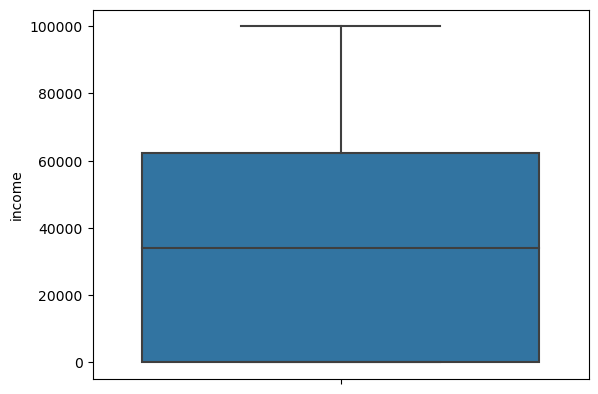

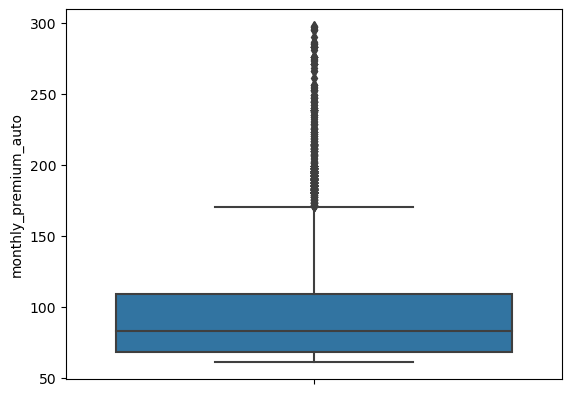

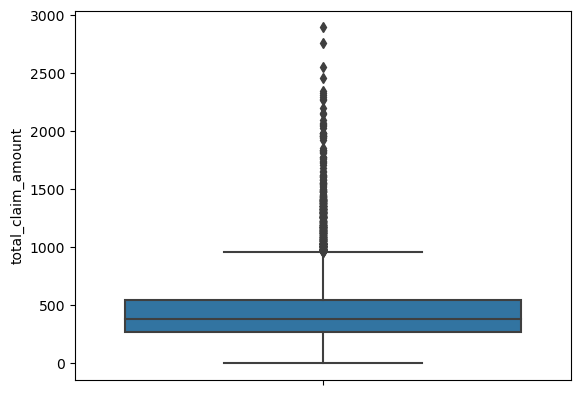

In [20]:
for column in continous_numerical_df.columns:
    sns.boxplot(y=column, data = continous_numerical_df)
    plt.show()

In [21]:
numerical_df 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [22]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

#  Lab | Cleaning categorical data

In [23]:
categorical_df = customer_df.select_dtypes('object')
display(categorical_df)
categorical_df.shape

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


(9134, 15)

# Checking for NaNs

In [24]:
categorical_df.isna().sum()


customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [25]:
categorical_df.value_counts(dropna=False)

customer  state       response  coverage  education             employmentstatus  gender  location_code  marital_status  policy_type     policy        renew_offer_type  sales_channel  vehicle_class  vehicle_size
AA10041   California  No        Basic     High School or Below  Unemployed        M       Suburban       Single          Personal Auto   Personal L3   Offer1            Call Center    SUV            Medsize         1
RL28880   Nevada      No        Basic     Bachelor              Employed          F       Suburban       Divorced        Personal Auto   Personal L3   Offer1            Branch         Two-Door Car   Medsize         1
RK63095   California  No        Extended  College               Employed          M       Suburban       Single          Personal Auto   Personal L3   Offer2            Web            Two-Door Car   Medsize         1
RK76184   Arizona     No        Basic     College               Unemployed        M       Suburban       Married         Personal Auto   

# confirming data types

In [26]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [27]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


# Exploring categorical columns

In [28]:
categorical_df["state"].unique()
categorical_df["state"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [29]:
categorical_df['state'] = np.where(categorical_df['state'].isin(['Nevada','Washington']) , 'other', categorical_df['state'])

In [30]:
categorical_df["state"].value_counts()

California    3150
Oregon        2601
Arizona       1703
other         1680
Name: state, dtype: int64

# Responds column 

In [31]:
categorical_df["response"].unique()
categorical_df["response"].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [32]:
#coverage 
categorical_df["coverage"].unique()
categorical_df["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [33]:
categorical_df['coverage'] = np.where(categorical_df['coverage'].isin(['Extended','Premium']) , 'other', categorical_df['coverage'])
categorical_df["coverage"].value_counts()

Basic    5568
other    3566
Name: coverage, dtype: int64

# education

In [34]:
#education
categorical_df["education"].unique()
categorical_df["education"].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [35]:
categorical_df['education'] = np.where(categorical_df['education'].isin(['Master','Doctor']) , 'other', categorical_df['education'])
categorical_df["education"].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
other                   1083
Name: education, dtype: int64

In [36]:
#employmentstatus
categorical_df["employmentstatus"].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [37]:
categorical_df['employmentstatus'] = np.where(categorical_df['employmentstatus'].isin(['Medical Leave','Disabled','Retired']) , 'other', categorical_df['employmentstatus'])
categorical_df["employmentstatus"].value_counts()

Employed      5698
Unemployed    2317
other         1119
Name: employmentstatus, dtype: int64

In [38]:
#
categorical_df["gender"].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [39]:
#location_code
categorical_df["location_code"].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [40]:
categorical_df['location_code'] = np.where(categorical_df['location_code'].isin(['Urban','Rural']) , 'other', categorical_df['location_code'])
categorical_df["location_code"].value_counts()

Suburban    5779
other       3355
Name: location_code, dtype: int64

# marital_status

In [41]:
#marital_status
categorical_df["marital_status"].value_counts()


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [42]:
#marital_status
categorical_df['marital_status'] = np.where(categorical_df['marital_status'].isin(['Divorced','Single']) , 'other', categorical_df['marital_status'])
categorical_df["marital_status"].value_counts()

Married    5298
other      3836
Name: marital_status, dtype: int64

# policy_type

In [43]:
#policy_type
categorical_df["policy_type"].value_counts()


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [44]:
categorical_df['policy_type'] = np.where(categorical_df['policy_type'].isin(['Corporate Auto','Special Auto']) , 'other', categorical_df['policy_type'])
categorical_df["policy_type"].value_counts()

Personal Auto    6788
other            2346
Name: policy_type, dtype: int64

In [45]:
categorical_df["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [46]:
# policy
categorical_df["policy"] = np.where(categorical_df["policy"].isin(["Corporate L2", "Corporate L1","Special L2",
                                                                   "Special L3","Special L1"]), "other", categorical_df['policy'])

categorical_df["policy"].value_counts()

Personal L3     3426
Personal L2     2122
other           1332
Personal L1     1240
Corporate L3    1014
Name: policy, dtype: int64

In [47]:
#
categorical_df["renew_offer_type"].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

# vehicle_class

In [48]:
# vehicle_class
categorical_df["vehicle_class"].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [49]:
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(
    ['Sports Car','Luxury SUV', "Luxury Car","SUV","Two-Door Car"]) , 'other', categorical_df['vehicle_class'])
categorical_df["vehicle_class"].value_counts()

Four-Door Car    4621
other            4513
Name: vehicle_class, dtype: int64

# vehicle_class

In [50]:
# vehicle_Size
categorical_df["vehicle_size"].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

# renew_offer_type

In [51]:
#renew_offer_type
categorical_df['renew_offer_type'].value_counts() # = np.where(categorical_df['renew_offer_type'].isin(['Corporate Auto','Special Auto']) , 'other', categorical_df['policy_type'])

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [52]:
categorical_df['renew_offer_type'] = np.where(categorical_df['renew_offer_type'].isin(['Offer4','Offer3']) , 'other', categorical_df['renew_offer_type'])
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
other     2456
Name: renew_offer_type, dtype: int64

In [53]:
categorical_df.head(5)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,other,No,Basic,Bachelor,Employed,F,Suburban,Married,other,Corporate L3,Offer1,Agent,other,Medsize
1,QZ44356,Arizona,No,other,Bachelor,Unemployed,F,Suburban,other,Personal Auto,Personal L3,other,Agent,Four-Door Car,Medsize
2,AI49188,other,No,other,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,other,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,other,other,Offer1,Call Center,other,Medsize
4,HB64268,other,No,Basic,Bachelor,Employed,M,other,other,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [54]:
categorical_df = categorical_df.drop(['customer'],axis=1)
categorical_df.shape

(9134, 14)

In [55]:
categorical_df.shape

(9134, 14)

# Lab Feature extraction

In [102]:
 categorical_df


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,other,No,Basic,Bachelor,Employed,F,Suburban,Married,other,Corporate L3,Offer1,Agent,other,Medsize
1,Arizona,No,other,Bachelor,Unemployed,F,Suburban,other,Personal Auto,Personal L3,other,Agent,Four-Door Car,Medsize
2,other,No,other,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,other,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,other,other,Offer1,Call Center,other,Medsize
4,other,No,Basic,Bachelor,Employed,M,other,other,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,other,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,other,College,Employed,F,Suburban,other,other,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,other,Bachelor,Unemployed,M,Suburban,other,other,other,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,other,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,other,Branch,Four-Door Car,Large


In [97]:
def plotCats(dataFrame):
    for column in dataFrame:
        fig, ax = plt.subplots()
        dataFrame[column].value_counts().plot(kind='bar')
        plt.show()

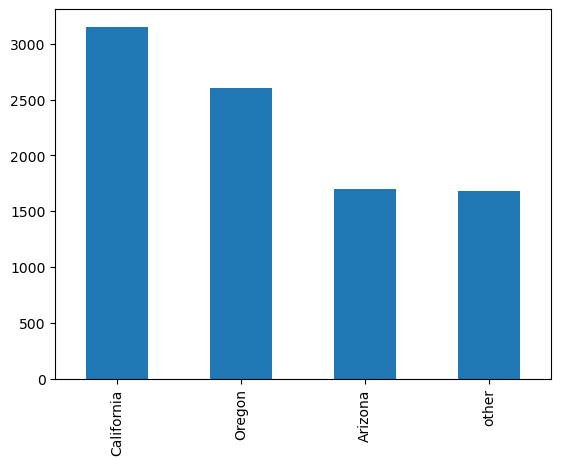

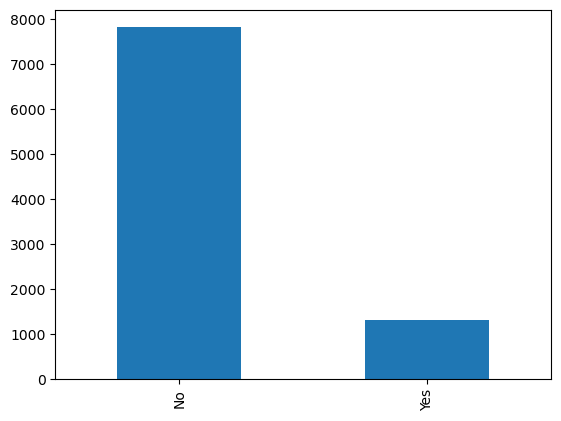

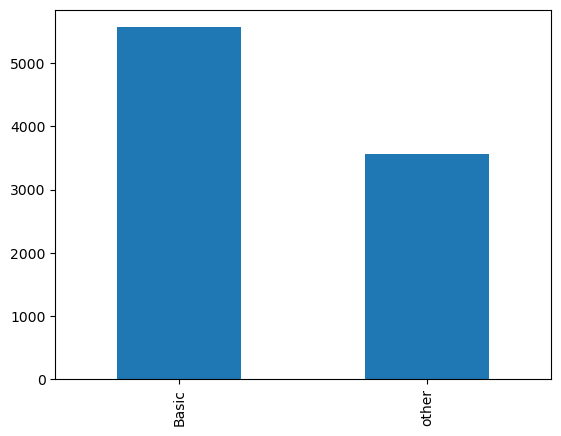

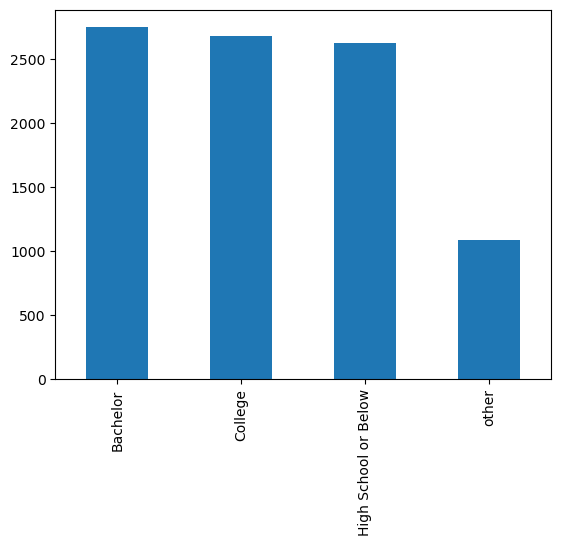

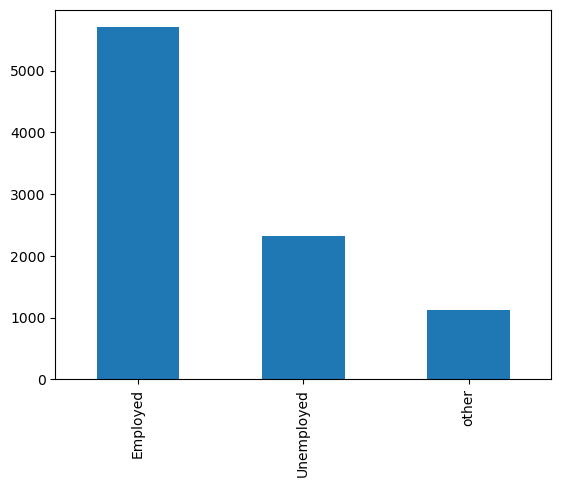

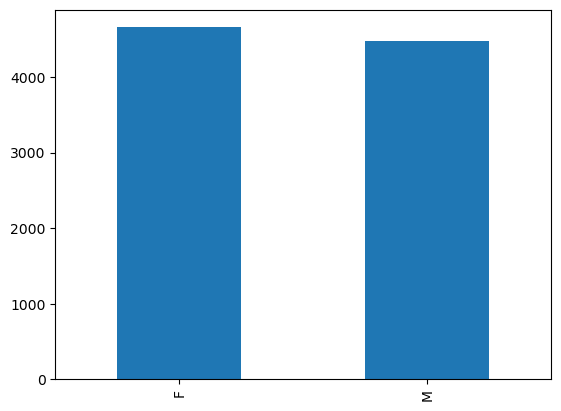

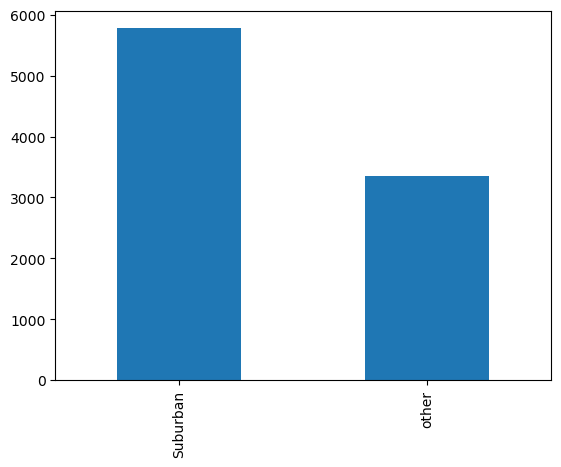

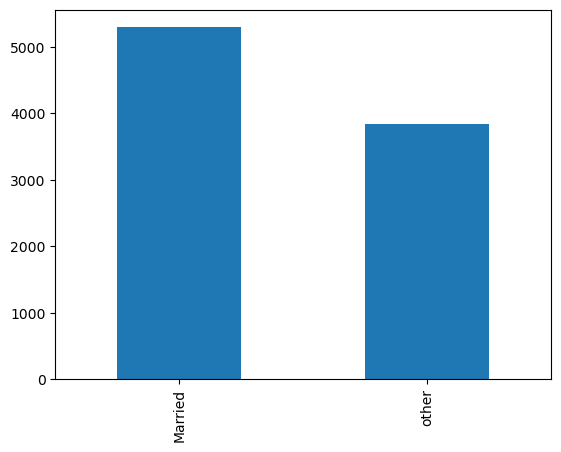

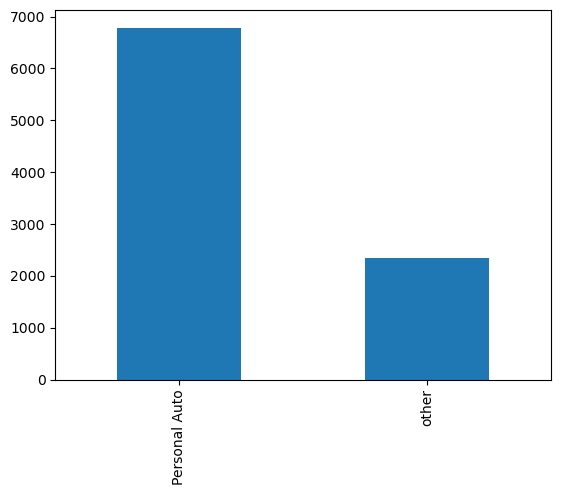

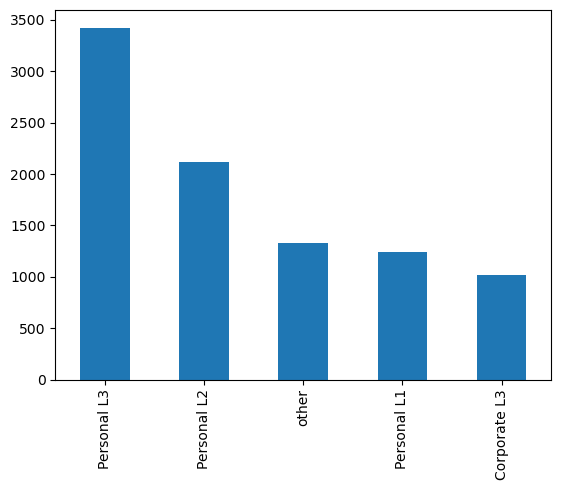

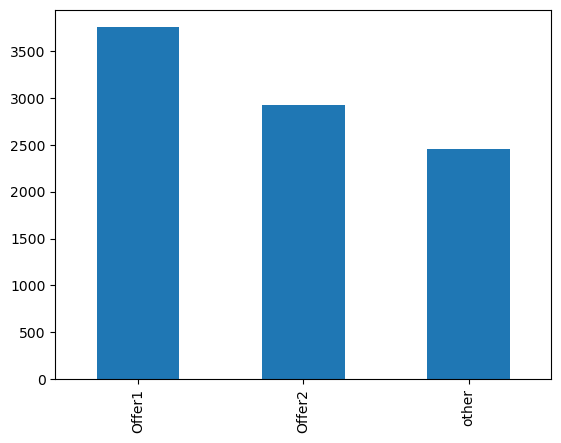

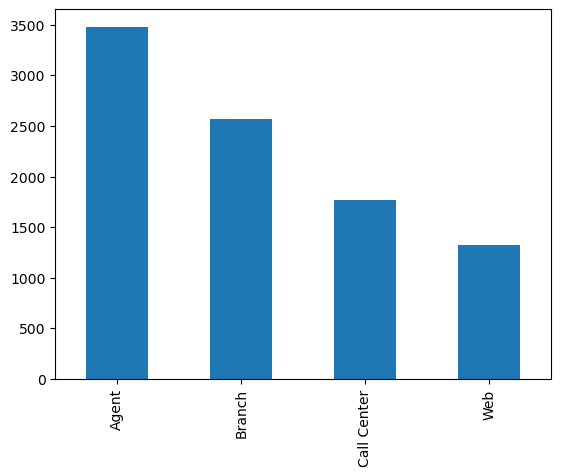

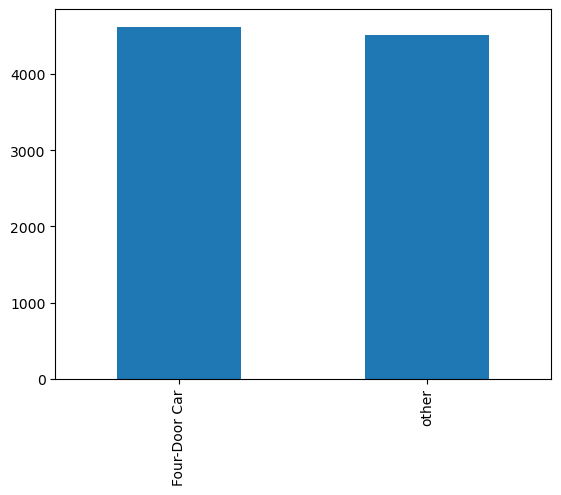

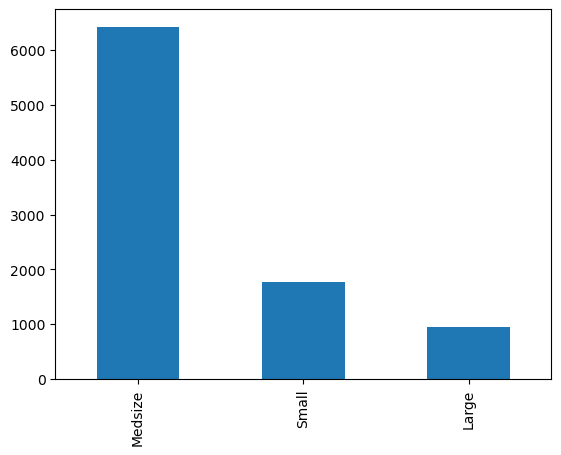

In [98]:
plotCats(categorical_df)

#####  The time variable can be useful. You shoud transform its data into a more  useful form. Hint: Day, week, and month as integers might be useful.

In [103]:
# Bring 'effective_to_date' to categorical
categorical_df['effective_to_date'] = customer_df["effective_to_date"]
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,other,No,Basic,Bachelor,Employed,F,Suburban,Married,other,Corporate L3,Offer1,Agent,other,Medsize,2011-02-24
1,Arizona,No,other,Bachelor,Unemployed,F,Suburban,other,Personal Auto,Personal L3,other,Agent,Four-Door Car,Medsize,2011-01-31
2,other,No,other,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,other,Medsize,2011-02-19
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,other,other,Offer1,Call Center,other,Medsize,2011-01-20
4,other,No,Basic,Bachelor,Employed,M,other,other,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,other,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011-02-10
9130,California,Yes,other,College,Employed,F,Suburban,other,other,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011-02-12
9131,California,No,other,Bachelor,Unemployed,M,Suburban,other,other,other,Offer1,Branch,Four-Door Car,Medsize,2011-02-06
9132,California,No,other,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,other,Branch,Four-Door Car,Large,2011-02-03


In [ ]:
categorical_df['effective_to_date'].hist(bins=200)

In [104]:
# counting daytime column and poltting the counts
counts = categorical_df.groupby(categorical_df['effective_to_date'].dt.date).count()

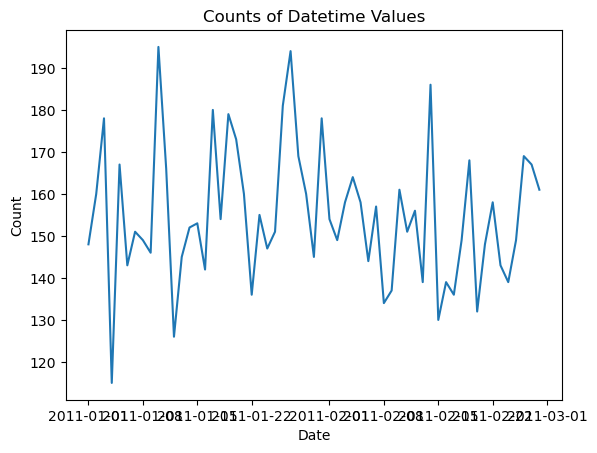

In [105]:
plt.plot(counts.index, counts['effective_to_date'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Counts of Datetime Values')
plt.show()

# Lab 3

In [56]:
data = pd.concat([categorical_df, numerical_df], axis=1)  

In [57]:
data.head(5)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,other,No,Basic,Bachelor,Employed,F,Suburban,Married,other,Corporate L3,...,other,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,other,Bachelor,Unemployed,F,Suburban,other,Personal Auto,Personal L3,...,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,other,No,other,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,...,other,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,other,other,...,other,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,other,No,Basic,Bachelor,Employed,M,other,other,Personal Auto,Personal L1,...,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879


In [58]:
# splitting into X and y
X = data.drop(['total_claim_amount'],axis=1)
y = data['total_claim_amount']

In [59]:
y.head(5)

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total_claim_amount, dtype: float64

In [60]:
X.isna().sum()

state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

# split, train, testing

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [62]:
X_train.shape

(7307, 21)

# Get categorical & numerical train and test

In [63]:
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

In [64]:
X_train_num  = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
7706,3265.156348,25820,82,10,69,0,1
779,11318.130830,79270,95,28,61,3,2
8189,6274.447705,13662,85,29,37,0,3
1942,4297.189057,66331,107,0,74,0,1
459,10110.778180,15752,90,27,37,0,2


### Use the standard scaler to fit X_train num, transform both x_train_num and x_test_num

In [65]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)
X_train_standardized = transformer.transform(X_train_num)
X_test_standardized = transformer.transform(X_test_num)
pd.DataFrame(X_train_standardized).head()

,0,1,2,3,4,5,6
0,-0.689028,-0.385792,-0.325793,-0.503413,0.755270,-0.418947,-0.819325
1,0.484415,1.371370,0.050504,1.288859,0.467992,2.880997,-0.401806
2,-0.250528,-0.785485,-0.238955,1.388429,-0.393843,-0.418947,0.015713
3,-0.538645,0.946002,0.397854,-1.499119,0.934819,-0.418947,-0.819325
4,0.308485,-0.716777,-0.094226,1.189288,-0.393843,-0.418947,-0.401806


### Putting standardized(transform) in dataframe

In [66]:
X_train_standardized = pd.DataFrame(X_train_standardized)
X_test_standardized = pd.DataFrame(X_test_standardized)
X_test_standardized

,0,1,2,3,4,5,6
0,-0.419831,0.625669,-0.817873,-1.100837,1.437556,0.681034,1.268270
1,-0.453387,-0.536491,0.860988,-1.200407,-1.291587,-0.418947,-0.819325
2,-0.364990,-0.120788,-0.731035,-0.403842,1.258007,-0.418947,2.520828
3,-0.625609,-0.657438,0.079450,-0.901696,-1.542956,-0.418947,-0.819325
4,0.099975,0.498443,0.455746,-1.001266,0.432082,-0.418947,2.103309
...,...,...,...,...,...,...,...
1822,-0.804672,1.911405,-0.933656,0.094011,0.252533,-0.418947,-0.819325
1823,-0.426471,1.714353,0.947826,-0.901696,0.216623,-0.418947,-0.819325
1824,0.903496,1.664219,-0.673143,1.687141,1.078458,-0.418947,-0.401806
1825,-0.563372,-1.234622,0.745205,0.492294,1.473465,2.880997,-0.819325


# Ordinal Encoding of selected X_train_cat and X-test_cat

### ENcode the categorical variables x-train_cat using ordinal encoding

In [67]:
X_train_cat
ordinal_X_train_cat = X_train_cat[["coverage", "employmentstatus", "location_code", "vehicle_size"]]
ordinal_X_train_cat


,coverage,employmentstatus,location_code,vehicle_size
7706,other,Employed,Suburban,Medsize
779,other,Employed,Suburban,Medsize
8189,other,other,Suburban,Small
1942,other,Employed,Suburban,Large
459,other,other,other,Large
...,...,...,...,...
350,other,other,other,Medsize
79,Basic,Employed,other,Small
8039,Basic,other,Suburban,Small
6936,Basic,other,Suburban,Large


In [68]:
ordinal_X_train_cat["coverage"] = ordinal_X_train_cat["coverage"].map({"Basic" : 0, "other" : 1})

C:\Users\ansah\AppData\Local\Temp\ipykernel_10300\2124631726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_X_train_cat["coverage"] = ordinal_X_train_cat["coverage"].map({"Basic" : 0, "other" : 1})


In [69]:

ordinal_X_train_cat["employmentstatus"] = ordinal_X_train_cat["employmentstatus"].map({"Unemployed" : 0, "other" : 1, "Employed" : 2})

C:\Users\ansah\AppData\Local\Temp\ipykernel_10300\2389230045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_X_train_cat["employmentstatus"] = ordinal_X_train_cat["employmentstatus"].map({"Unemployed" : 0, "other" : 1, "Employed" : 2})


In [70]:
ordinal_X_train_cat["location_code"] = ordinal_X_train_cat["location_code"].map({"other" : 0, "Suburban" : 1})

C:\Users\ansah\AppData\Local\Temp\ipykernel_10300\3680102409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_X_train_cat["location_code"] = ordinal_X_train_cat["location_code"].map({"other" : 0, "Suburban" : 1})


In [71]:
ordinal_X_train_cat["vehicle_size"] = ordinal_X_train_cat["vehicle_size"].map({"Small" : 0, "Medsize":1, "Large" : 2})

C:\Users\ansah\AppData\Local\Temp\ipykernel_10300\2912881522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_X_train_cat["vehicle_size"] = ordinal_X_train_cat["vehicle_size"].map({"Small" : 0, "Medsize":1, "Large" : 2})


### ordinal encode; the X_test column as well

In [72]:
ordinal_X_test_cat = X_test_cat[["coverage", "employmentstatus", "location_code", "vehicle_size"]]
ordinal_X_test_cat

,coverage,employmentstatus,location_code,vehicle_size
7175,Basic,Employed,Suburban,Medsize
7255,other,Employed,other,Medsize
2846,Basic,Employed,other,Large
1211,other,other,Suburban,Medsize
4294,other,Employed,other,Medsize
...,...,...,...,...
6798,Basic,Employed,other,Medsize
5301,other,Employed,other,Medsize
8093,Basic,Employed,Suburban,Medsize
5091,Basic,Unemployed,Suburban,Medsize


In [73]:
ordinal_X_test_cat["coverage"] = ordinal_X_test_cat["coverage"].map({"Basic" : 0, "other" : 1})

C:\Users\ansah\AppData\Local\Temp\ipykernel_10300\241511567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_X_test_cat["coverage"] = ordinal_X_test_cat["coverage"].map({"Basic" : 0, "other" : 1})


In [74]:
ordinal_X_test_cat["employmentstatus"] = ordinal_X_test_cat["employmentstatus"].map({"Unemployed" : 0, "other" : 1, "Employed" : 2})

C:\Users\ansah\AppData\Local\Temp\ipykernel_10300\696296317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_X_test_cat["employmentstatus"] = ordinal_X_test_cat["employmentstatus"].map({"Unemployed" : 0, "other" : 1, "Employed" : 2})


In [75]:
ordinal_X_test_cat["location_code"] = ordinal_X_test_cat["location_code"].map({"other" : 0, "Suburban" : 1})

C:\Users\ansah\AppData\Local\Temp\ipykernel_10300\666103731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_X_test_cat["location_code"] = ordinal_X_test_cat["location_code"].map({"other" : 0, "Suburban" : 1})


In [76]:
ordinal_X_test_cat["vehicle_size"] = ordinal_X_test_cat["vehicle_size"].map({"Small" : 0, "Medsize":1, "Large" : 2})

C:\Users\ansah\AppData\Local\Temp\ipykernel_10300\4133826395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_X_test_cat["vehicle_size"] = ordinal_X_test_cat["vehicle_size"].map({"Small" : 0, "Medsize":1, "Large" : 2})


In [77]:
ordinal_X_test_cat

,coverage,employmentstatus,location_code,vehicle_size
7175,0,2,1,1
7255,1,2,0,1
2846,0,2,0,2
1211,1,1,1,1
4294,1,2,0,1
...,...,...,...,...
6798,0,2,0,1
5301,1,2,0,1
8093,0,2,1,1
5091,0,0,1,1


## Giancarlo: Remember to reset index after ordinal encoding since the order was haphazard

In [78]:
ordinal_X_train_cat.reset_index(inplace = True, drop = True) # The (inplace = True) prevents new dataframe index

In [79]:
 ordinal_X_test_cat.reset_index(inplace = True, drop = True)

# Onehot encode remain categorical columns X_train_cat and X_test_cat

In [80]:
display(X_train_cat.head(1))
# Drop columns that have been ordinal_encoded to get onehot encodable columns
onehot_X_train_cat = X_train_cat.drop(["coverage", "employmentstatus", "location_code", "vehicle_size"], axis=1)
onehot_X_train_cat.head(1)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
7706,California,Yes,other,Bachelor,Employed,F,Suburban,other,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize


,state,response,education,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
7706,California,Yes,Bachelor,F,other,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car


In [81]:
display(X_test_cat.head(1))
# Drop columns that have been ordinal_encoded to get onehot encodable columns
onehot_X_test_cat = X_test_cat.drop(["coverage", "employmentstatus", "location_code", "vehicle_size"], axis=1)
onehot_X_test_cat.head(1)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
7175,Oregon,No,Basic,Bachelor,Employed,M,Suburban,other,Personal Auto,Personal L3,Offer1,Web,Four-Door Car,Medsize


,state,response,education,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
7175,Oregon,No,Bachelor,M,other,Personal Auto,Personal L3,Offer1,Web,Four-Door Car


## now onehot encode

In [82]:
#using onehot encoder
#fit only on the train set but encode both train x-set and x-set
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(onehot_X_train_cat)
onehot_X_train_cat_encoded = encoder.transform(onehot_X_train_cat).toarray()
onehot_X_test_cat_encoded = encoder.transform(onehot_X_test_cat).toarray()


In [83]:
display(onehot_X_train_cat_encoded)
onehot_X_test_cat_encoded 

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Put encoded in dataframe

In [84]:
onehot_X_test_cat_encoded = pd.DataFrame(onehot_X_test_cat_encoded)

onehot_X_train_cat_encoded = pd.DataFrame(onehot_X_train_cat_encoded)
onehot_X_train_cat_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7304,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7305,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [85]:
X_train_standardized

,0,1,2,3,4,5,6
0,-0.689028,-0.385792,-0.325793,-0.503413,0.755270,-0.418947,-0.819325
1,0.484415,1.371370,0.050504,1.288859,0.467992,2.880997,-0.401806
2,-0.250528,-0.785485,-0.238955,1.388429,-0.393843,-0.418947,0.015713
3,-0.538645,0.946002,0.397854,-1.499119,0.934819,-0.418947,-0.819325
4,0.308485,-0.716777,-0.094226,1.189288,-0.393843,-0.418947,-0.401806
...,...,...,...,...,...,...,...
7302,-0.033682,-0.451312,0.368908,0.293152,1.042548,1.781016,0.015713
7303,7.310954,0.781299,2.684579,-1.499119,-0.645211,0.681034,-0.401806
7304,-0.352059,-0.869809,-0.586306,1.089717,0.072984,-0.418947,0.433232
7305,-0.569899,-0.471727,0.397854,1.587571,0.432082,-0.418947,-0.819325


# concating x_train and X_test categoricals 

In [86]:
X_train_cat_encoded = pd.concat((ordinal_X_train_cat,onehot_X_train_cat_encoded), axis = 1)
X_train_cat_encoded 
X_test_cat_encoded = pd.concat((ordinal_X_test_cat, onehot_X_test_cat_encoded), axis = 1)

# Concat X_train_cat with X_train_num. Do same for X_test_cat and X_test_num

In [87]:
X_train = pd.concat((X_train_standardized, X_train_cat_encoded ), axis = 1)
display(X_train)
X_test = pd.concat((X_test_standardized, X_test_cat_encoded ), axis = 1)
X_test

,0,1,2,3,4,5,6,coverage,employmentstatus,location_code,...,10,11,12,13,14,15,16,17,18,19
0,-0.689028,-0.385792,-0.325793,-0.503413,0.755270,-0.418947,-0.819325,1,2,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.484415,1.371370,0.050504,1.288859,0.467992,2.880997,-0.401806,1,2,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.250528,-0.785485,-0.238955,1.388429,-0.393843,-0.418947,0.015713,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.538645,0.946002,0.397854,-1.499119,0.934819,-0.418947,-0.819325,1,2,1,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.308485,-0.716777,-0.094226,1.189288,-0.393843,-0.418947,-0.401806,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,-0.033682,-0.451312,0.368908,0.293152,1.042548,1.781016,0.015713,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,7.310954,0.781299,2.684579,-1.499119,-0.645211,0.681034,-0.401806,0,2,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7304,-0.352059,-0.869809,-0.586306,1.089717,0.072984,-0.418947,0.433232,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7305,-0.569899,-0.471727,0.397854,1.587571,0.432082,-0.418947,-0.819325,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


,0,1,2,3,4,5,6,coverage,employmentstatus,location_code,...,10,11,12,13,14,15,16,17,18,19
0,-0.419831,0.625669,-0.817873,-1.100837,1.437556,0.681034,1.268270,0,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.453387,-0.536491,0.860988,-1.200407,-1.291587,-0.418947,-0.819325,1,2,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-0.364990,-0.120788,-0.731035,-0.403842,1.258007,-0.418947,2.520828,0,2,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.625609,-0.657438,0.079450,-0.901696,-1.542956,-0.418947,-0.819325,1,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.099975,0.498443,0.455746,-1.001266,0.432082,-0.418947,2.103309,1,2,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,-0.804672,1.911405,-0.933656,0.094011,0.252533,-0.418947,-0.819325,0,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1823,-0.426471,1.714353,0.947826,-0.901696,0.216623,-0.418947,-0.819325,1,2,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1824,0.903496,1.664219,-0.673143,1.687141,1.078458,-0.418947,-0.401806,0,2,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1825,-0.563372,-1.234622,0.745205,0.492294,1.473465,2.880997,-0.819325,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# comparing models

### 6.Try a simple linear regression with all the data to see whether we are getting good results.

### Linear regresion model

In [88]:
from sklearn import linear_model
# linear regression

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

C:\Users\ansah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

### Get the R^2 of our model (the train data gives it,  X_train and y_train)

In [89]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

C:\Users\ansah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7162812986110403

#### r^2 for X_test confirms if the Linear regression model is genuinely predicting 

In [93]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

C:\Users\ansah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6998707948172913

# For KNN model

In [94]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)

C:\Users\ansah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsRegressor(n_neighbors=3)

In [96]:
# score for train data
score_train = KNN.score(X_train, y_train)
score_train

C:\Users\ansah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7949682538219024

In [97]:
# confirm if model is goo with test data
score = KNN.score(X_test, y_test)
score

C:\Users\ansah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6004934331243359

In [ ]:
# Over training occurs when the model performs well on the score of the training set but pooly on the test data or set.
# For over training to occur, there needs to be a big gap between the scores of the  Training sets and test sets.

# Since the gaps between the scores of the "train data" and the "test data" in both Linear Regression and KNN models are not huge, My conclusion is both models are good

# Lab random variable distribution

In [92]:
data=numerical_df

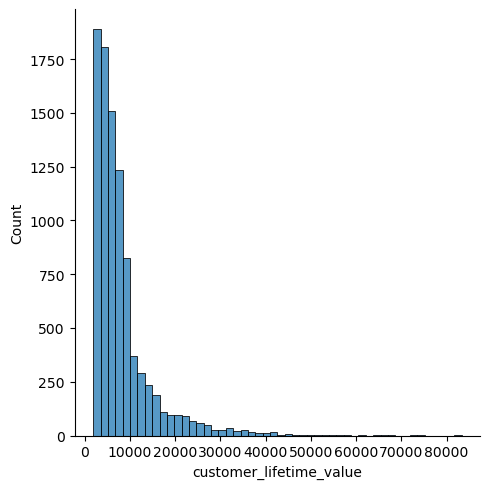

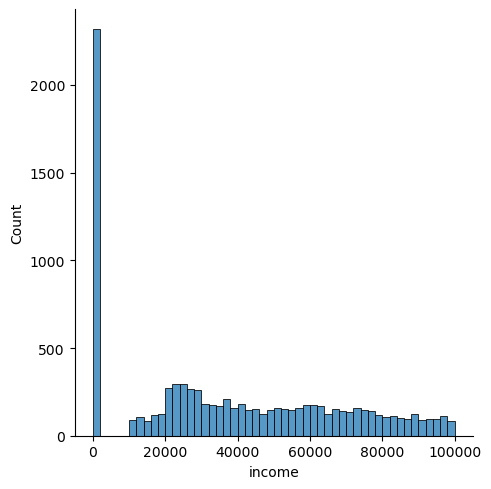

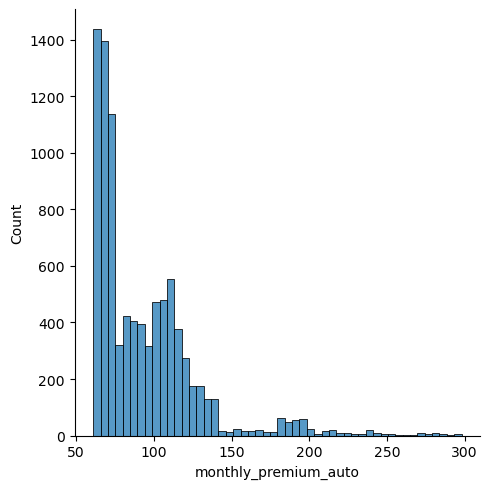

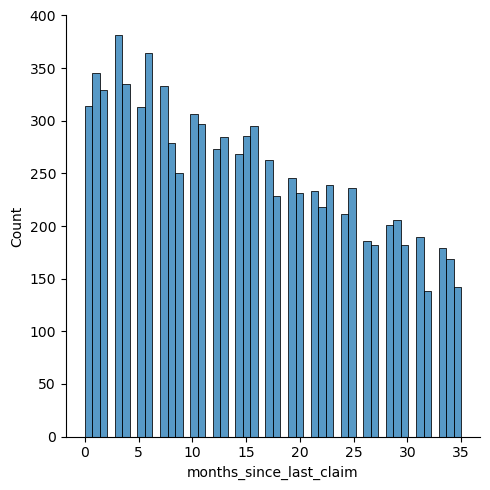

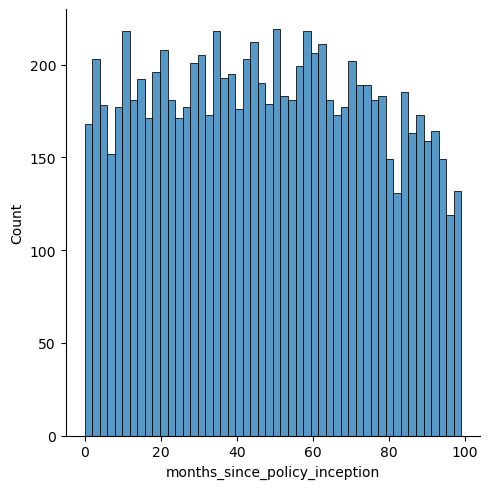

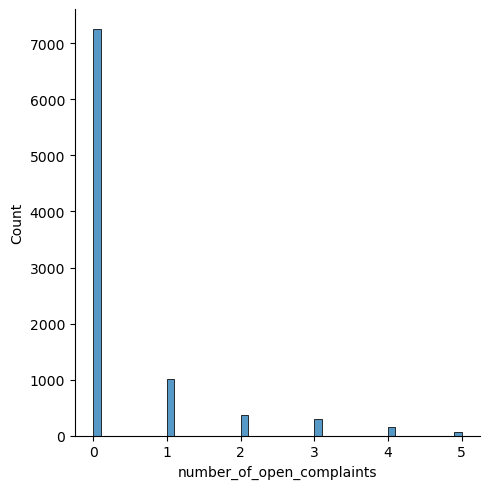

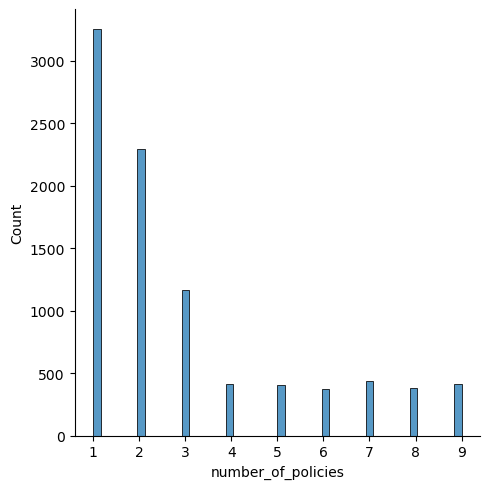

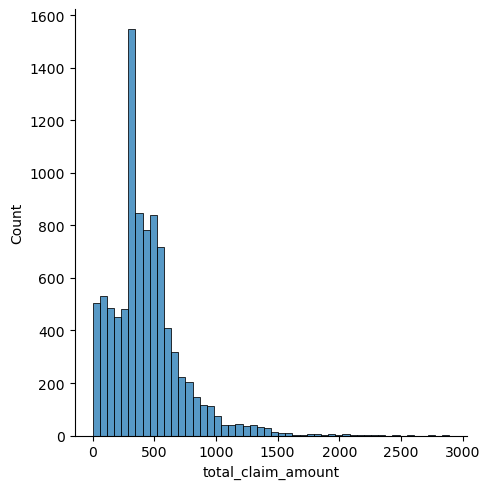

In [93]:
sns.displot(data['customer_lifetime_value'], bins=50)
sns.displot(data['income'], bins=50)
sns.displot(data['monthly_premium_auto'], bins=50)
sns.displot(data['months_since_last_claim'], bins=50)
sns.displot(data['months_since_policy_inception'], bins=50)
sns.displot(data['number_of_open_complaints'], bins=50)
sns.displot(data['number_of_policies'], bins=50)
sns.displot(data['total_claim_amount'], bins=50)
plt.show()

# They are all not normal distributions but more like exponential distributions

# Transforming by log transform;(log-transform)

In [94]:
data_log = np.log(data+1)
data_log

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924622,10.938006,4.248495,3.496508,1.791759,0.000000,0.693147,5.955348
1,8.850881,0.000000,4.553877,2.639057,3.761200,0.000000,2.197225,7.032152
2,9.464085,10.794830,4.691348,2.944439,3.663562,0.000000,1.098612,6.341192
3,8.942051,0.000000,4.672829,2.944439,4.189655,0.000000,2.079442,6.274539
4,7.942608,10.688233,4.304065,2.564949,3.806662,0.000000,0.693147,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,11.183616,4.304065,2.944439,4.499810,0.000000,1.098612,5.294484
9130,8.038354,9.980680,4.382027,2.708050,3.367296,0.000000,0.693147,5.940697
9131,9.007599,0.000000,4.454347,2.302585,3.637586,1.386294,1.098612,6.674290
9132,8.926045,9.996158,4.574711,3.555348,1.386294,0.000000,1.386294,6.539875


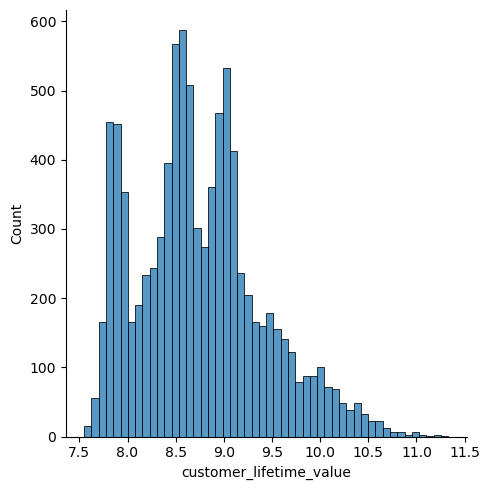

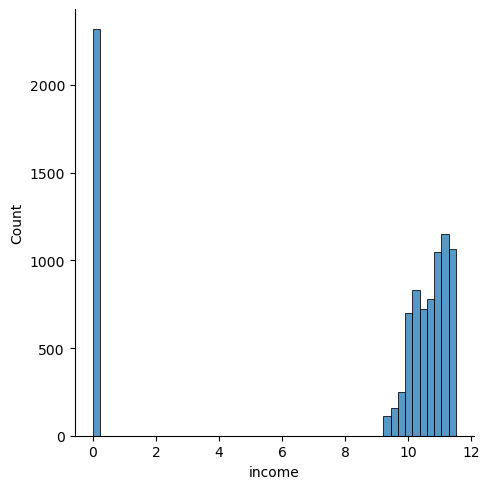

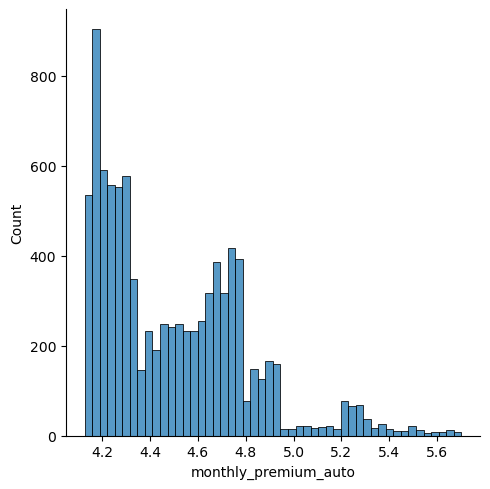

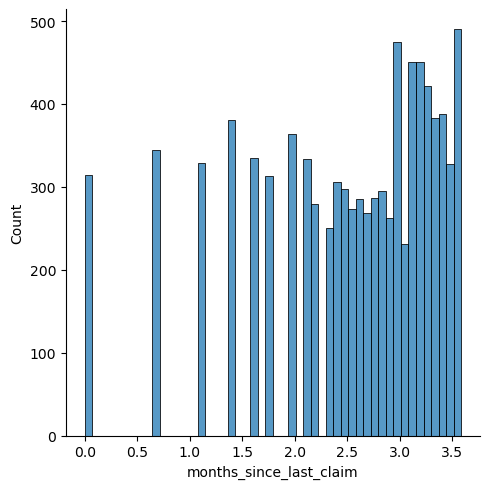

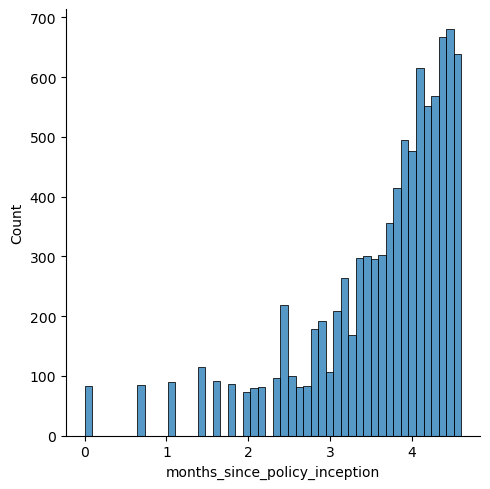

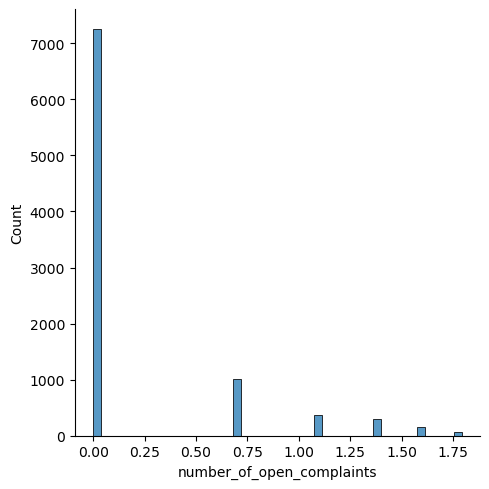

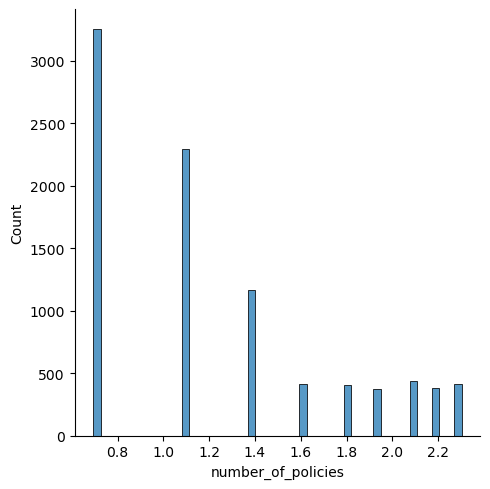

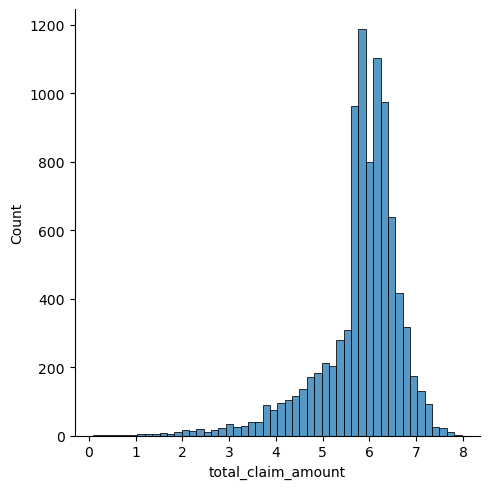

In [95]:
sns.displot(data_log['customer_lifetime_value'], bins=50)
sns.displot(data_log['income'], bins=50)
sns.displot(data_log['monthly_premium_auto'], bins=50)
sns.displot(data_log['months_since_last_claim'], bins=50)
sns.displot(data_log['months_since_policy_inception'], bins=50)
sns.displot(data_log['number_of_open_complaints'], bins=50)
sns.displot(data_log['number_of_policies'], bins=50)
sns.displot(data_log['total_claim_amount'], bins=50)
plt.show()

# Customer lifetime value and total claim amount looks better towards a normal distribution after logging them